Epoch 1/5


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8701 - loss: 0.4752 - val_accuracy: 0.9668 - val_loss: 0.1112
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9741 - loss: 0.0882 - val_accuracy: 0.9778 - val_loss: 0.0761
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9833 - loss: 0.0550 - val_accuracy: 0.9806 - val_loss: 0.0629
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9884 - loss: 0.0392 - val_accuracy: 0.9852 - val_loss: 0.0520
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9813 - val_loss: 0.0618
Epoch 1/5


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7466 - loss: 0.8400 - val_accuracy: 0.9205 - val_loss: 0.2797
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9309 - loss: 0.2440 - val_accuracy: 0.9312 - val_loss: 0.2345
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9447 - loss: 0.1893 - val_accuracy: 0.9586 - val_loss: 0.1546
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9586 - loss: 0.1429 - val_accuracy: 0.9528 - val_loss: 0.1602
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9613 - loss: 0.1345 - val_accuracy: 0.9627 - val_loss: 0.1336
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0666
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.1555
CNN Test Accuracy: 0.9817000031471252
RNN Test Accuracy: 0.9595999717712402


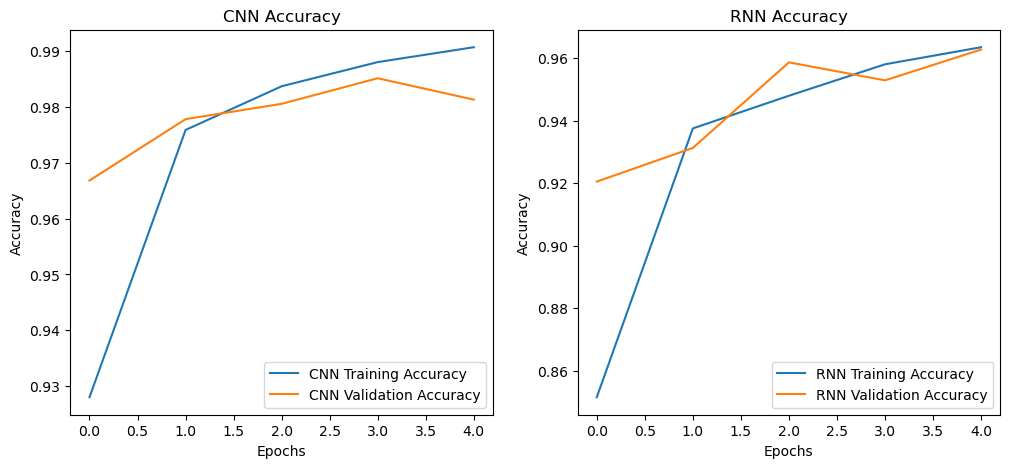

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (28x28x1) and RNN (28 timesteps, 28 features)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# Split the data into train and validation sets
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=42)
x_train_rnn, x_val_rnn, y_train_rnn, y_val_rnn = train_test_split(x_train_rnn, y_train, test_size=0.2, random_state=42)

# CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=5, batch_size=128)

# RNN model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train_rnn, y_train_rnn, validation_data=(x_val_rnn, y_val_rnn), epochs=5, batch_size=128)

# Evaluate both models on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test_rnn, y_test)

# Print the results
print(f"CNN Test Accuracy: {cnn_test_acc}")
print(f"RNN Test Accuracy: {rnn_test_acc}")

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.2324 - val_loss: 0.0673
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - loss: 0.0661 - val_loss: 0.0650
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.0645 - val_loss: 0.0641
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - loss: 0.0634 - val_loss: 0.0635
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0628 - val_loss: 0.0631
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - loss: 0.3235 - val_loss: 0.2001
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.1892 - val_loss: 0.1670
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.1625 - val_loss: 0.1518
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.1476 - val_loss: 0.1418
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.1398 - val_loss: 0.1341
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


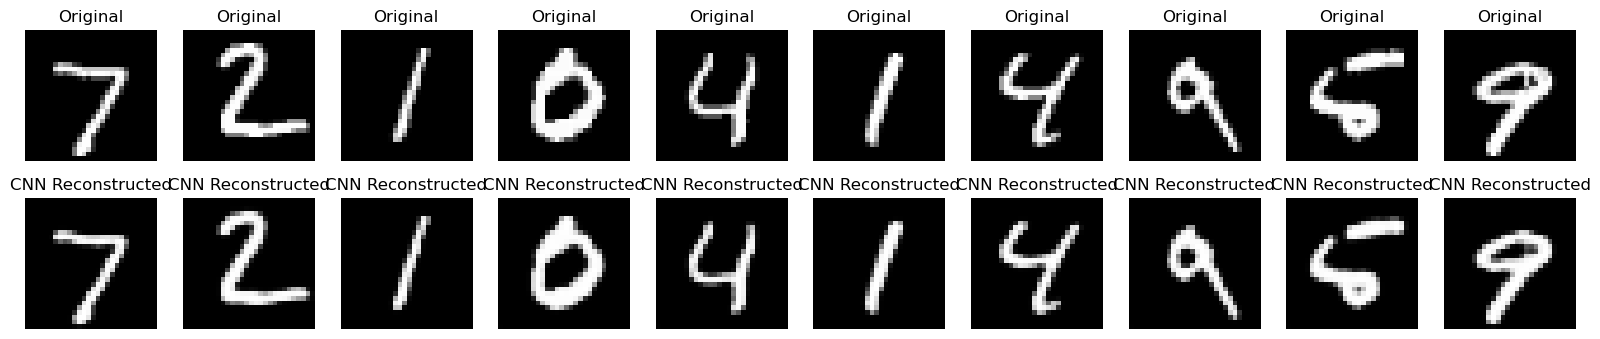

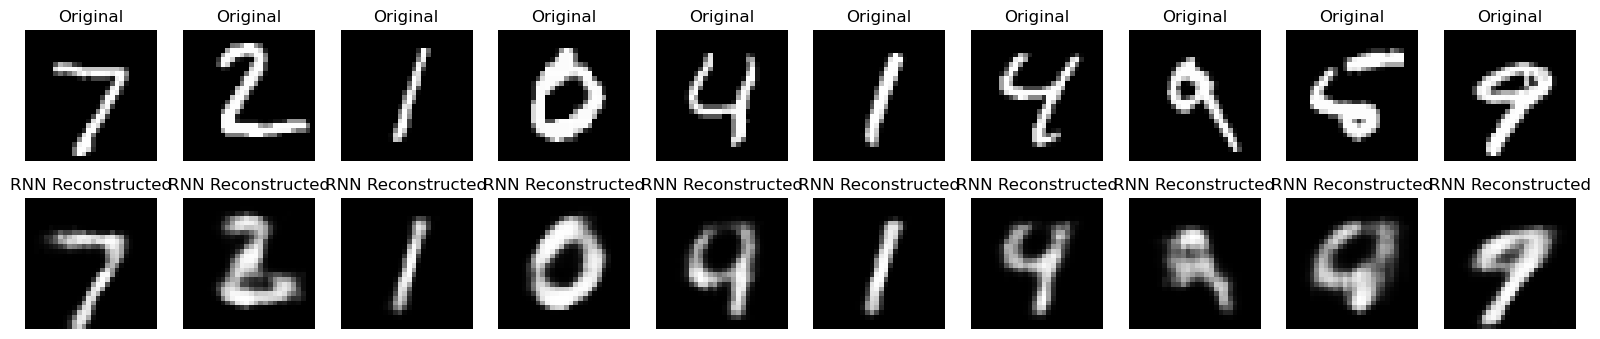

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Reshape, SimpleRNN, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (28x28x1) and RNN (28 timesteps, 28 features)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=5, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    RepeatVector(28),
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=5, batch_size=128, validation_split=0.2)

# Reconstruct images using both models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("CNN Reconstructed")
    plt.axis('off')

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rnn_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("RNN Reconstructed")
    plt.axis('off')

plt.show()

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 0.2273 - val_loss: 0.0670
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - loss: 0.0659 - val_loss: 0.0650
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0643 - val_loss: 0.0642
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.0635 - val_loss: 0.0636
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0630 - val_loss: 0.0632
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - loss: 0.3144 - val_loss: 0.2045
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 0.1922 - val_loss: 0.1662
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.1615 - val_loss: 0.1492
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.1471 - val_loss: 0.1394
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.1380 - val_loss: 0.1328
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - loss: 0.3271 - val_loss: 0.1863
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s

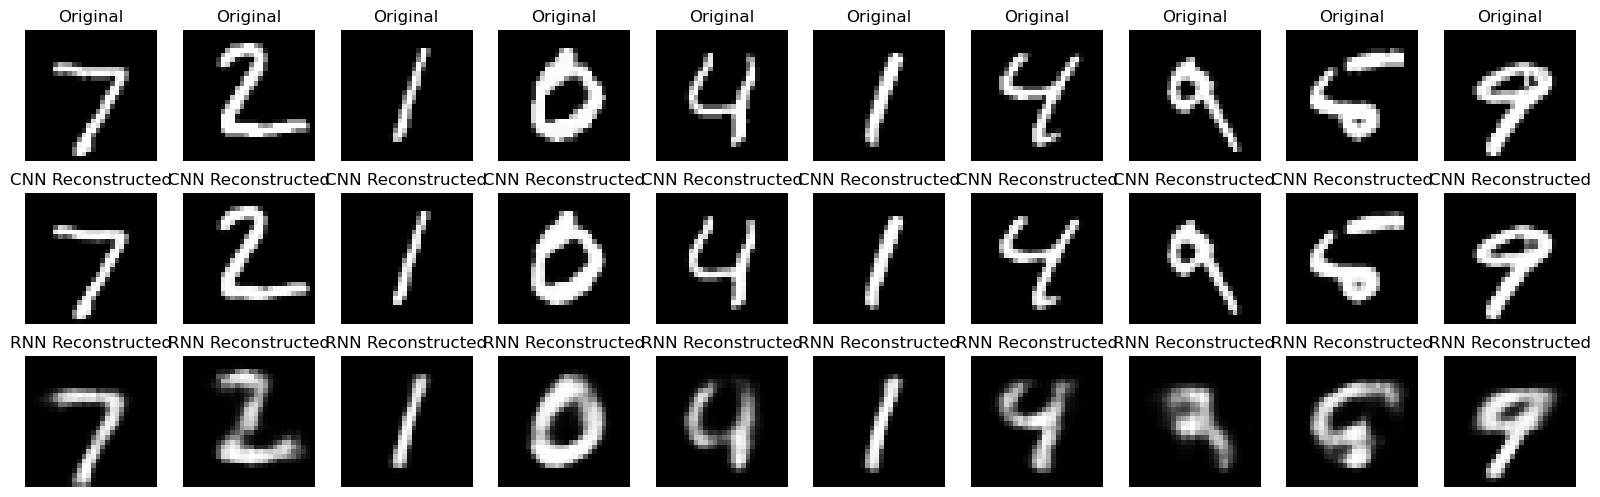

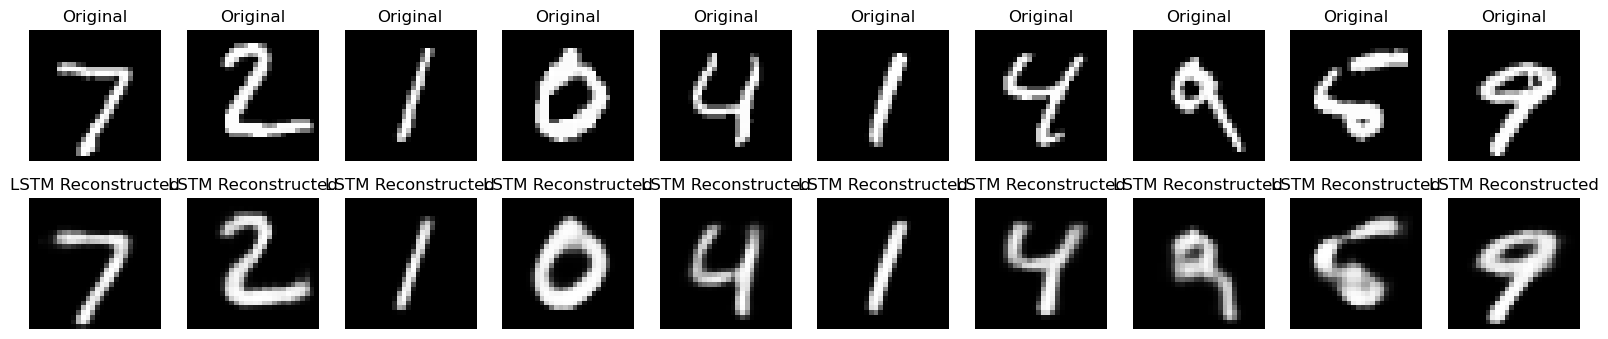

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Reshape, SimpleRNN, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (28x28x1), RNN and LSTM (28 timesteps, 28 features)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=5, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    RepeatVector(28),
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=5, batch_size=128, validation_split=0.2)

# LSTM autoencoder model
lstm_autoencoder = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    RepeatVector(28),
    # Decoder
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28, activation='sigmoid'))
])

lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
lstm_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=5, batch_size=128, validation_split=0.2)

# Reconstruct images using all models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn)
lstm_reconstructed = lstm_autoencoder.predict(x_test_rnn)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("CNN Reconstructed")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(rnn_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("RNN Reconstructed")
    plt.axis('off')

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display LSTM reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(lstm_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("LSTM Reconstructed")
    plt.axis('off')

plt.show()

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Reshape, SimpleRNN, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# Define CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

# Define RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    RepeatVector(28),
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28, activation='sigmoid'))
])

# Define LSTM autoencoder model
lstm_autoencoder = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    RepeatVector(28),
    # Decoder
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(28, activation='sigmoid'))
])

# Compile models (no need to fit to display summaries)
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print summaries of the models
print("CNN Autoencoder Summary:")
cnn_autoencoder.summary()

print("\nRNN Autoencoder Summary:")
rnn_autoencoder.summary()

print("\nLSTM Autoencoder Summary:")
lstm_autoencoder.summary()

CNN Autoencoder Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)


RNN Autoencoder Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 28, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 28, 28)         │         3,612 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,604 (221.11 KB)

 Trainable params: 56,604 (221.11 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Autoencoder Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 28, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 28, 28)         │         3,612 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,580 (842.11 KB)

 Trainable params: 215,580 (842.11 KB)

 Non-trainable params: 0 (0.00 B)